<a href="https://colab.research.google.com/github/ryana-tammi/Investigate-Hotel-Business-using-Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

In [ ]:
#Import modul
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 6
rcParams['lines.linewidth'] = 1
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Import dataset
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mini Project 2 Data Visualisasi/hotel_bookings_data.csv')

In [ ]:
#Import dataset
#df = pd.read_csv('hotel_bookings_data.csv', on_bad_lines='skip')
#df.head()

In [ ]:
df1 = df.copy()

In [ ]:
print('Data yang duplikat = ', df1.duplicated().sum())

Data yang duplikat =  33261


In [ ]:
df1 = df1.drop_duplicates() #Menghapus data duplicate

In [ ]:
print('Data yang duplikat = ', df1.duplicated().sum())

Data yang duplikat =  0


In [ ]:
#Jumlah entry NULL di setiap kolom
df1.isna().sum().sort_values(ascending=False)

company                           81019
agent                             11941
city                                450
children                              4
hotel                                 0
is_repeated_guest                     0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
previous_bookings_not_canceled        0
previous_cancellations                0
market_segment                        0
distribution_channel                  0
is_canceled                           0
meal                                  0
babies                                0
adults                                0
stays_in_weekdays_nights              0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_week_number              0


In [ ]:
percentage_of_null_values = ((df1.isnull().sum())*100/len(df1)).sort_values(ascending = False)
percentage_of_null_values

company                           94.067039
agent                             13.864088
city                               0.522472
children                           0.004644
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [ ]:
#Drop kolom 'company' yang memiliki nilai null >50%
df1.drop('company', axis=1, inplace=True) 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86125 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
nums = ['is_canceled','lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_weekdays_nights','adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'customer_type', 'reservation_status']

In [ ]:
df1[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,86129.0,0.275587,0.446812,0.00,0.00,0.00,1.00,1.0
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86125.0,0.140284,0.458347,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0


In [ ]:
df1[cats].describe().transpose()

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
arrival_date_month,86129,12,October,11150
meal,86129,5,Breakfast,67088
city,85679,177,Kota Denpasar,26903
market_segment,86129,8,Online TA,51393
distribution_channel,86129,5,TA/TO,68141
customer_type,86129,4,Personal,71648
reservation_status,86129,3,Check-Out,62393


In [ ]:
#missing value kolom `agent` diisi dengan mean,karena pada deskriptif statistiknya mean<median. 
df1['agent'].fillna(df1['agent'].mean(), inplace=True)

In [ ]:
#missing value kolom `city` diisi dengan 'No City'.
df1['city'].fillna('No City', inplace=True)

In [ ]:
# cek jumlah missing data setelah preprocessing
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          4
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
#missing value dg 1 value yang kosong diisi denga mode
df1 = df1.fillna(df1.mode().iloc[0])

In [ ]:
# cek jumlah missing data setelah preprocessing
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Value 'Undefined' di replace dengan 'No Meal'
df1['meal'].replace('Undefined', 'No Meal', inplace = True)

In [ ]:
df1['meal'].value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
df1['reservation_status'].value_counts()

Check-Out    62393
Canceled     22737
No-Show        999
Name: reservation_status, dtype: int64

In [ ]:
#Drop kolom 'is_canceled' karena sudah termasuk dalam kolom 'reservation_status'
df1.drop('is_canceled', axis=1, inplace=True) 

In [ ]:
df1.info() #cek kolom yang masiih ada

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   lead_time                       86129 non-null  int64  
 2   arrival_date_year               86129 non-null  int64  
 3   arrival_date_month              86129 non-null  object 
 4   arrival_date_week_number        86129 non-null  int64  
 5   arrival_date_day_of_month       86129 non-null  int64  
 6   stays_in_weekend_nights         86129 non-null  int64  
 7   stays_in_weekdays_nights        86129 non-null  int64  
 8   adults                          86129 non-null  int64  
 9   children                        86129 non-null  float64
 10  babies                          86129 non-null  int64  
 11  meal                            86129 non-null  object 
 12  city                           

In [ ]:
df_hotel = df1.groupby(['hotel']).agg({'meal':'count'}).reset_index()
df_hotel

,hotel,meal
0,City Hotel,52575
1,Resort Hotel,33554


#Montly Hotel Booking Analysis

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df2 = df.copy()
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
#Mengubah kolom type 'arrival_date_month' dari string menjadi number
look_up = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
            'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df2['arrival_date_month'] = df2['arrival_date_month'].apply(lambda x: look_up[x])
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,9,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,9,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,9,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
#Tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
df_hotel = df2.groupby(['arrival_date_year','arrival_date_month','hotel']).agg({'hotel':['count']}).reset_index()
df_hotel.head()

arrival_date_year arrival_date_month         hotel      
                                                     count
0              2017                  1    City Hotel  1235
1              2017                  1  Resort Hotel  1105
2              2017                  2    City Hotel  1654
3              2017                  2  Resort Hotel  1266
4              2017                  9    City Hotel  1398

In [ ]:
#Mengganti label kolom agar value count dapat terdeteksi
df22 = df_hotel.set_axis(['Year', 'Month', 'Hotel','Total Reservation'],axis=1)
df22.head()

,Year,Month,Hotel,Total Reservation
0,2017,1,City Hotel,1235
1,2017,1,Resort Hotel,1105
2,2017,2,City Hotel,1654
3,2017,2,Resort Hotel,1266
4,2017,9,City Hotel,1398


In [ ]:
# Month di re-scale ke [0,1] (normalisasi)
#df_z['CashbackAmount_normalisasi'] = MinMaxScaler().fit_transform(df_z['CashbackAmount'].values.reshape(len(df_z), 1))

In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               52 non-null     int64 
 1   Month              52 non-null     int64 
 2   Hotel              52 non-null     object
 3   Total Reservation  52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [ ]:
#Menambah kolom 'Date'
df22['Date'] = pd.to_datetime(df22[['Year', 'Month']].assign(DAY=1))
df22.head()

,Year,Month,Hotel,Total Reservation,Date
0,2017,1,City Hotel,1235,2017-01-01
1,2017,1,Resort Hotel,1105,2017-01-01
2,2017,2,City Hotel,1654,2017-02-01
3,2017,2,Resort Hotel,1266,2017-02-01
4,2017,9,City Hotel,1398,2017-09-01


In [ ]:
#Menambah kolom 'Date'
#df2['Date'] = df2[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
#df2.head()

In [ ]:
df22.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,52.0,2018.076923,0.736876,2017.0,2018.00,2018.0,2019.00,2019.0
Month,52.0,6.730769,3.447735,1.0,4.00,7.0,10.00,12.0
Total Reservation,52.0,2295.961538,1009.864288,884.0,1500.25,1789.0,3192.75,4556.0


Text(0.5, 1.0, 'Jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel')

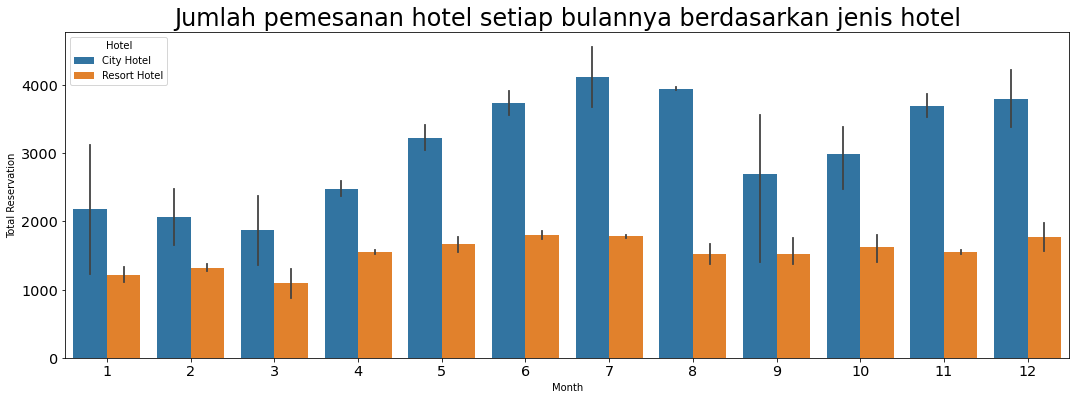

In [ ]:
#Grafik Jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
sns.barplot(x='Month', y='Total Reservation', hue='Hotel', data=df22)
plt.title('Jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel', size = 24)
# figure size in inches
#rcParams['figure.figsize'] = 30,8.27

In [ ]:
#df.groupby(['arrival_date_month', 'hotel'])['hotel'].count().unstack().plot()
#plt.title('Monthly Total Order Hotel', loc='center', pad=30, fontsize=20, color='black')
#plt.xlabel('Bulan Kedatangan', fontsize=15)
#plt.ylabel('Total Amount', fontsize=15)
#plt.ylim(ymin=0)
#plt.gcf().set_size_inches(10, 5)
#plt.tight_layout()
#plt.show()

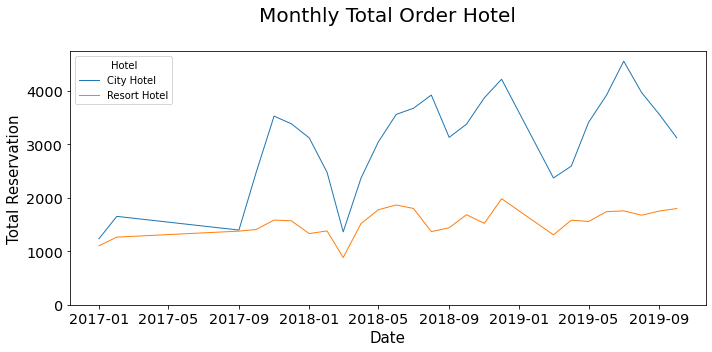

In [ ]:
#Grafik Jumlah pemesanan hotel berdasarkan jenis hotel dengan date time series
sns.lineplot(data=df22, x="Date", y="Total Reservation", hue="Hotel")
plt.title('Monthly Total Order Hotel', loc='center', pad=30, fontsize=20, color='black')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Reservation', fontsize=15)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

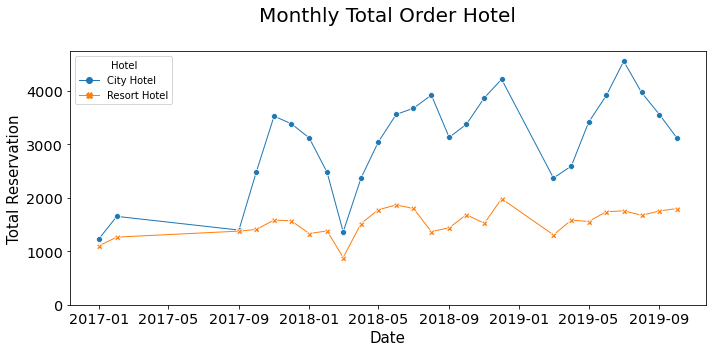

In [ ]:
#Grafik Jumlah pemesanan hotel berdasarkan jenis hotel dengan date time series
sns.lineplot(
    data=df22, x="Date", y="Total Reservation", hue="Hotel",style="Hotel",
    markers=True, dashes=False,
)
plt.title('Monthly Total Order Hotel', loc='center', pad=30, fontsize=20, color='black')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Reservation', fontsize=15)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [ ]:
df3 = df.copy()
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
print('Data yang duplikat = ', df3.duplicated().sum())

Data yang duplikat =  33261


In [ ]:
df3 = df3.drop_duplicates() #Menghapus data duplicate

In [ ]:
print('Data yang duplikat = ', df3.duplicated().sum())

Data yang duplikat =  0


In [ ]:
#Jumlah entry NULL di setiap kolom
df3.isna().sum().sort_values(ascending=False)

company                           81019
agent                             11941
city                                450
children                              4
hotel                                 0
is_repeated_guest                     0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
previous_bookings_not_canceled        0
previous_cancellations                0
market_segment                        0
distribution_channel                  0
is_canceled                           0
meal                                  0
babies                                0
adults                                0
stays_in_weekdays_nights              0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_week_number              0


In [ ]:
percentage_of_null_values = ((df3.isnull().sum())*100/len(df3)).sort_values(ascending = False)
percentage_of_null_values

company                           94.067039
agent                             13.864088
city                               0.522472
children                           0.004644
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [ ]:
#Drop kolom 'company' yang memiliki nilai null >50%
df3.drop('company', axis=1, inplace=True) 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86125 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
nums = ['is_canceled','lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_weekdays_nights','adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'customer_type', 'reservation_status']

In [ ]:
df3[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,86129.0,0.275587,0.446812,0.00,0.00,0.00,1.00,1.0
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86125.0,0.140284,0.458347,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0


In [ ]:
df3[cats].describe().transpose()

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
arrival_date_month,86129,12,October,11150
meal,86129,5,Breakfast,67088
city,85679,177,Kota Denpasar,26903
market_segment,86129,8,Online TA,51393
distribution_channel,86129,5,TA/TO,68141
customer_type,86129,4,Personal,71648
reservation_status,86129,3,Check-Out,62393


In [ ]:
#missing value kolom `agent` diisi dengan mean,karena pada deskriptif statistiknya mean<median. 
df3['agent'].fillna(df3['agent'].mean(), inplace=True)

In [ ]:
#missing value kolom `city` diisi dengan 'No City'.
df3['city'].fillna('No City', inplace=True)

In [ ]:
# cek jumlah missing data setelah preprocessing
df3.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          4
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
#missing value dg 1 value yang kosong diisi denga mode
df3 = df3.fillna(df3.mode().iloc[0])

In [ ]:
# cek jumlah missing data setelah preprocessing
df3.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Value 'Undefined' di replace dengan 'No Meal'
df3['meal'].replace('Undefined', 'No Meal', inplace = True)

In [ ]:
df3['meal'].value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Mengubah kolom type 'arrival_date_month' dari string menjadi number
look_up = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df3['arrival_date_month'] = df3['arrival_date_month'].apply(lambda x: look_up[x])
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,9,27,1,0,0,2,...,0,3,No Deposit,94.268655,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,9,27,1,0,0,2,...,0,4,No Deposit,94.268655,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,9,27,1,0,1,1,...,0,0,No Deposit,94.268655,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,0,0,No Deposit,304.000000,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  int64  
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
#Tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
df_hotel_3 = df3.groupby(['arrival_date_year','arrival_date_month','hotel']).agg({'hotel':['count'], 'stays_in_weekend_nights' : ['sum'], 'stays_in_weekdays_nights' : ['sum'],'is_canceled' : ['sum']}).reset_index()
df_hotel_3.head()

arrival_date_year arrival_date_month         hotel        \
                                                     count   
0              2017                  1    City Hotel   763   
1              2017                  1  Resort Hotel   848   
2              2017                  2    City Hotel  1003   
3              2017                  2  Resort Hotel   950   
4              2017                  9    City Hotel   375   

  stays_in_weekend_nights stays_in_weekdays_nights is_canceled  
                      sum                      sum         sum  
0                     577                     1733         134  
1                     721                     2319         103  
2                     856                     2192         217  
3                     832                     2222         147  
4                     382                      935         223

In [ ]:
#Mengganti label kolom agar value count dapat terdeteksi
df_hotel_3 = df_hotel_3.set_axis(['Year', 'Month', 'Hotel','Total Reservation','stays_in_weekend_nights','stays_in_weekdays_nights','is_canceled'],axis=1)
df_hotel_3.head()

,Year,Month,Hotel,Total Reservation,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled
0,2017,1,City Hotel,763,577,1733,134
1,2017,1,Resort Hotel,848,721,2319,103
2,2017,2,City Hotel,1003,856,2192,217
3,2017,2,Resort Hotel,950,832,2222,147
4,2017,9,City Hotel,375,382,935,223


In [ ]:
df_hotel_3['Total Stays'] = df_hotel_3['stays_in_weekend_nights'] + df_hotel_3['stays_in_weekdays_nights']
df_hotel_3['%Ratio Cancelation'] = (df_hotel_3['is_canceled']/df_hotel_3['Total Stays'])*100
df_hotel_3.round(decimals = 2).head()

,Year,Month,Hotel,Total Reservation,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,Total Stays,%Ratio Cancelation
0,2017,1,City Hotel,763,577,1733,134,2310,5.80
1,2017,1,Resort Hotel,848,721,2319,103,3040,3.39
2,2017,2,City Hotel,1003,856,2192,217,3048,7.12
3,2017,2,Resort Hotel,950,832,2222,147,3054,4.81
4,2017,9,City Hotel,375,382,935,223,1317,16.93


In [ ]:
#Menambah kolom 'Date'
df_hotel_3['Date'] = pd.to_datetime(df22[['Year', 'Month']].assign(DAY=1))
df_hotel_3.head()

,Year,Month,Hotel,Total Reservation,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,Total Stays,%Ratio Cancelation,Date
0,2017,1,City Hotel,763,577,1733,134,2310,5.800866,2017-01-01
1,2017,1,Resort Hotel,848,721,2319,103,3040,3.388158,2017-01-01
2,2017,2,City Hotel,1003,856,2192,217,3048,7.119423,2017-02-01
3,2017,2,Resort Hotel,950,832,2222,147,3054,4.813360,2017-02-01
4,2017,9,City Hotel,375,382,935,223,1317,16.932422,2017-09-01


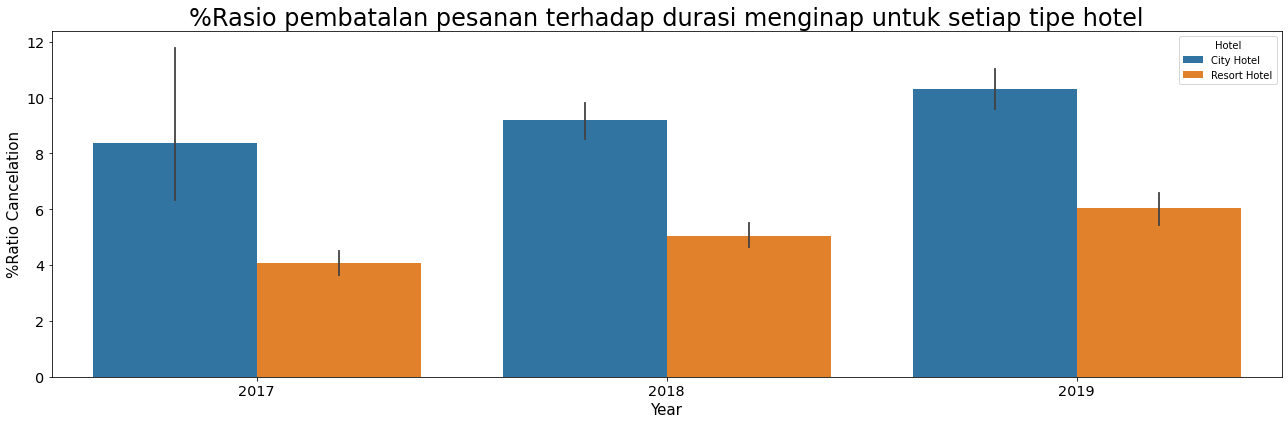

In [ ]:
#Grafik %rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel
sns.barplot(x='Year', y='%Ratio Cancelation', hue='Hotel', data=df_hotel_3)
plt.title('%Rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel', size = 24)
# figure size in inches
#rcParams['figure.figsize'] = 30,8.27
plt.xlabel('Year', fontsize=15)
plt.ylabel('%Ratio Cancelation', fontsize=15)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()

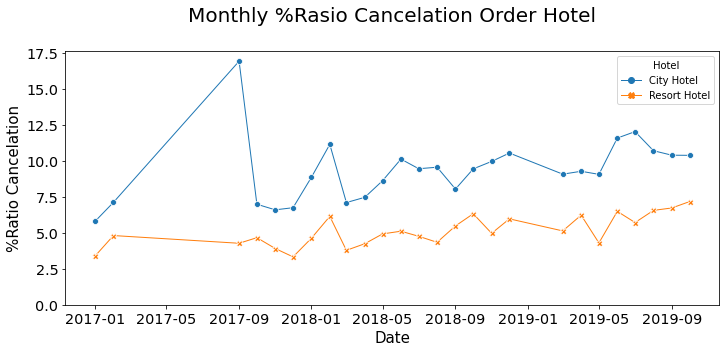

In [ ]:
#Grafik  %rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel
sns.lineplot(
    data=df_hotel_3, x="Date", y="%Ratio Cancelation", hue="Hotel",style="Hotel",
    markers=True, dashes=False,
)
plt.title('Monthly %Rasio Cancelation Order Hotel', loc='center', pad=30, fontsize=20, color='black')
plt.xlabel('Date', fontsize=15)
plt.ylabel('%Ratio Cancelation', fontsize=15)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

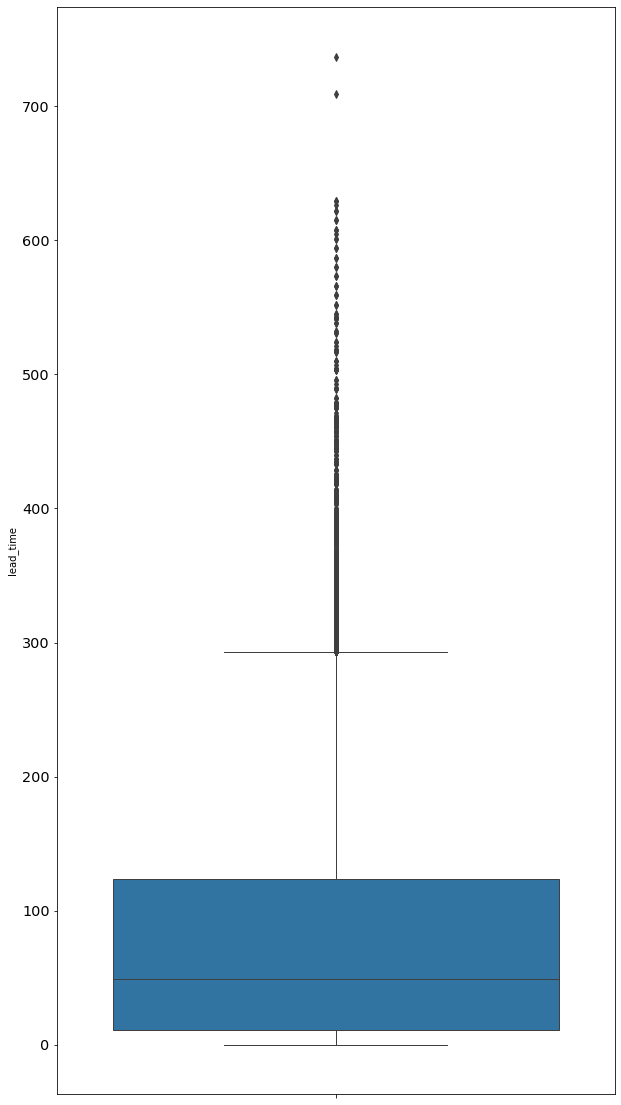

In [ ]:
plt.figure(figsize=(10,20))
sns.boxplot(y=df3['lead_time'], orient='v')

In [ ]:
col         = 'lead_time'
conditions  = [ df3[col] <= 30, (df3[col] >= 31) & (df3[col] <= 90), (df3[col] >= 91) & (df3[col] <= 180), (df3[col] >= 181) & (df3[col] <= 360), df3[col] > 360 ]
choices     = [ '<1 bulan', '>1 s.d 3 bulan', '>3 s.d 6 bulan', '>6 s.d 1tahun', '>satu tahun' ]
    
df3["Lead Time"] = np.select(conditions, choices, default=np.nan)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  int64  
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
perbandingan = ['hotel','Lead Time']


In [ ]:
df3[perbandingan].describe().transpose()

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
Lead Time,86129,5,<1 bulan,34363


In [ ]:
#Tabel agregat yang menunjukan perbandingan Lead time
df_hotel4 = df3.groupby(['hotel','Lead Time']).agg({'stays_in_weekend_nights' : ['sum'], 'stays_in_weekdays_nights' : ['sum'],'is_canceled' : ['sum'], 'Lead Time' : ['count']}).reset_index()
df_hotel4.head()

,hotel,Lead Time,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,Lead Time
,,,sum,sum,sum,count
0,City Hotel,<1 bulan,14619,37891,3946,20249
1,City Hotel,>1 s.d 3 bulan,13924,35434,4975,14907
2,City Hotel,>3 s.d 6 bulan,11572,30283,4168,11358
3,City Hotel,>6 s.d 1tahun,5708,15634,2565,5689
4,City Hotel,>satu tahun,220,664,200,372


In [ ]:
#Mengganti label kolom agar value count dapat terdeteksi
df_hotel4 = df_hotel4.set_axis(['Hotel','Rentang Waktu','stays_in_weekend_nights','stays_in_weekdays_nights','is_canceled','lead_time'],axis=1)
df_hotel4.head()

,Hotel,Rentang Waktu,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,lead_time
0,City Hotel,<1 bulan,14619,37891,3946,20249
1,City Hotel,>1 s.d 3 bulan,13924,35434,4975,14907
2,City Hotel,>3 s.d 6 bulan,11572,30283,4168,11358
3,City Hotel,>6 s.d 1tahun,5708,15634,2565,5689
4,City Hotel,>satu tahun,220,664,200,372


In [ ]:
df_hotel4['Total Stays'] = df_hotel4['stays_in_weekend_nights'] + df_hotel4['stays_in_weekdays_nights']
df_hotel4['%Ratio Cancelation'] = (df_hotel4['is_canceled']/df_hotel4['Total Stays'])*100
df_hotel4.round(decimals = 2).head()

,Hotel,Rentang Waktu,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,lead_time,Total Stays,%Ratio Cancelation
0,City Hotel,<1 bulan,14619,37891,3946,20249,52510,7.51
1,City Hotel,>1 s.d 3 bulan,13924,35434,4975,14907,49358,10.08
2,City Hotel,>3 s.d 6 bulan,11572,30283,4168,11358,41855,9.96
3,City Hotel,>6 s.d 1tahun,5708,15634,2565,5689,21342,12.02
4,City Hotel,>satu tahun,220,664,200,372,884,22.62


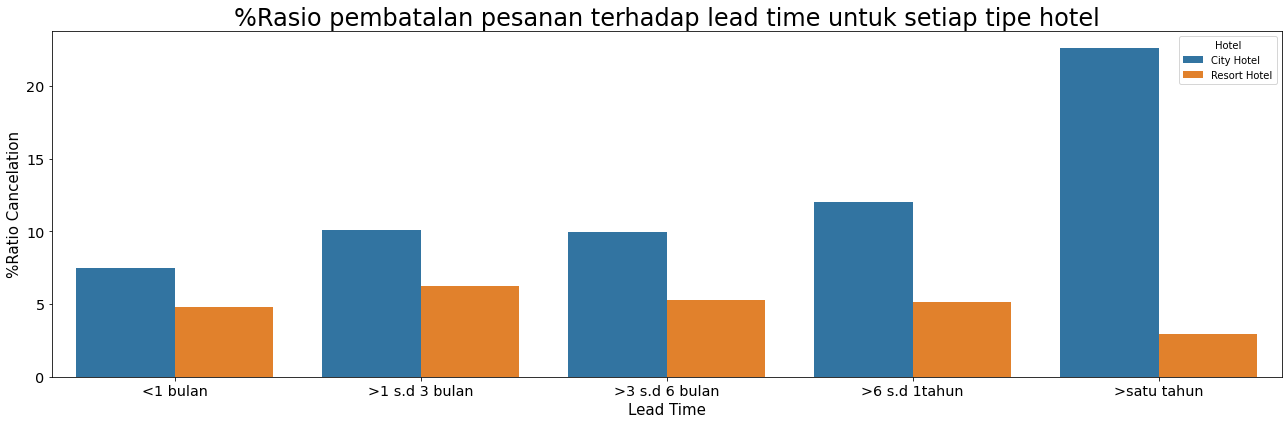

In [ ]:
#Grafik %rasio pembatalan pesanan terhadap lead time untuk setiap tipe hotel
sns.barplot(x='Rentang Waktu', y='%Ratio Cancelation', hue='Hotel', data=df_hotel4)
plt.title('%Rasio pembatalan pesanan terhadap lead time untuk setiap tipe hotel', size = 24)
# figure size in inches
#rcParams['figure.figsize'] = 30,8.27
plt.xlabel('Lead Time', fontsize=15)
plt.ylabel('%Ratio Cancelation', fontsize=15)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()